In [5]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 6.7 MB/s eta 0:00:09
   - -------------------------------------- 1.8/56.8 MB 5.0 MB/s eta 0:00:11
   - -------------------------------------- 2.6/56.8 MB 4.6 MB/s eta 0:00:12
   -- ------------------------------------- 3.4/56.8 MB 4.4 MB/s eta 0:00:13
   -- ------------------------------------- 3.9/56.8 MB 4.1 MB/s eta 0:00:13
   --- ------------------------------------ 4.5/56.8 MB 3.9 MB/s eta 0:00:14
   --- ------------------------------------ 5.0/56.8 MB 3.7 MB/s eta 0:00:14
   ---- ----------------------------------- 5.8/56.8 MB 3.7 MB/s eta 0:00:14
   ---- ----------------------------------- 6.8/56.8 MB 3.7 MB/s eta 0:00:14
   ----- ---------------------------------- 7.6/56.8 MB 3.7 MB/s eta 0:00:14
   ----- ---------------------------------- 8.4/56.8 MB 3.7 MB/s eta 0:00:14
   ------ --------------------------------- 9.2/56.8 MB 3.7 MB/s eta 0:00:13
   ---

#### Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# show plots inside notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Paellete
palette = ['#420b08', '#fad2cf']
color_palette = sns.color_palette(palette)


##### Load Dataset

In [13]:
# Load CSV file into DataFrame
df = pd.read_csv(r"D:\Project\amazon.csv")

# display shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 1465 rows and 16 columns.


####  Preview First Few Rows

In [15]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


####  Column Names & Data Types

In [17]:
# check column names
print("Column Names:", df.columns.tolist())

# check detailed info
df.info()

Column Names: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   objec

#### Missing Values Overview

In [19]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#### Observations

- The dataset contains 1465 rows and 16 columns.
- Most columns are stored as object (string) type, which may require transformation later.
- Columns include product details, pricing, discounts, ratings, reviews, and links.
- Some columns have missing values that will be addressed during preprocessing.

#### Data Cleaning & Preprocessing

In [21]:
# Convert prices to float
df['discounted_price'] = (
    df['discounted_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)
df['actual_price'] = (
    df['actual_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)

# Convert discount percentage to fraction
df['discount_percentage'] = (
    df['discount_percentage'].str.replace("%", "").astype(float) / 100
)

# Clean & convert ratings
df['rating'] = df['rating'].replace("|", "3.9").astype(float)

# Convert rating_count to numeric
df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

#### Handling Missing Values

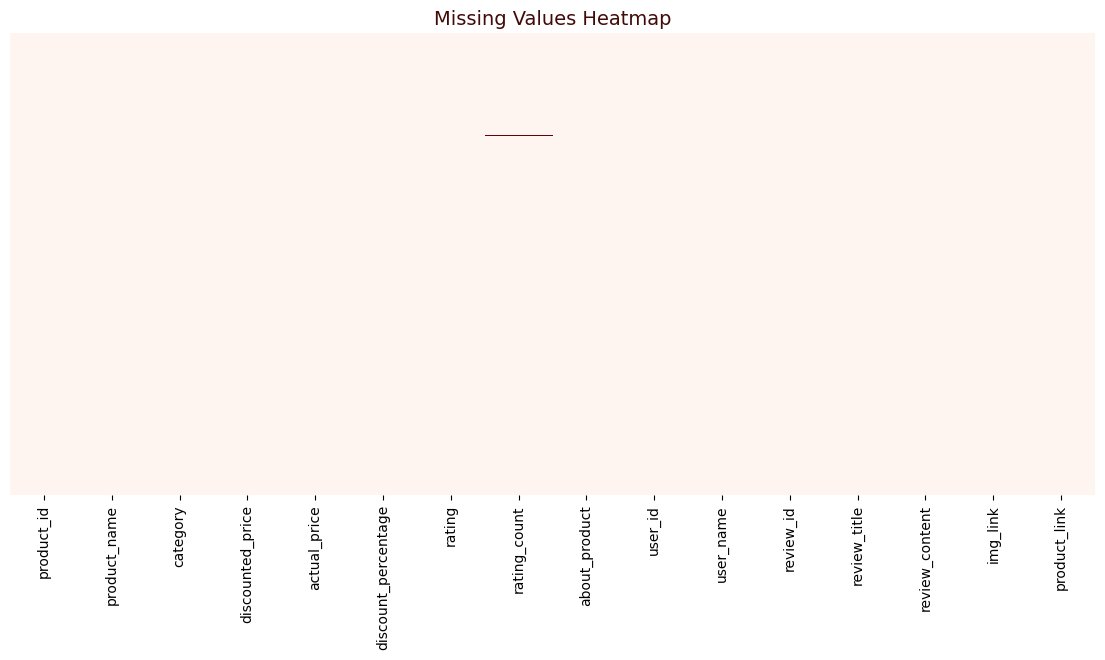

Missing values after imputation:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [23]:
# Check nulls
df.isnull().sum().sort_values(ascending=False)

# Visualize missing values
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14, color="#420b08")
plt.show()

# Impute missing values in rating_count with median
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

#### Check for Duplicates

In [25]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Descriptive Statistics

In [27]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18277.634812
std,6944.304394,10874.826864,0.216359,0.291620,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


# 📍 Observations

- Initially, all key numeric columns (discounted_price, actual_price, discount_percentage, rating, rating_count) were stored as object type.Converted to float64, making them suitable for analysis.
- During cleaning, an unusual value "|" was found in the rating column.
- Verified on Amazon (via product_id) → true rating 3.9.
-  Ensures accuracy by validating against the source instead of dropping/guessing values.
- Discount Percentage values standardized into fractions (e.g., 25% → 0.25) for consistent interpretation in modeling.
- rating_count column had missing values + formatting issues (commas in numbers).
- Missing values imputed using median (robust against outliers).
### After handling missing data:
- Milestone 1: Dataset is now free from null values.
### No duplicate records were found:
- Milestone 2: Dataset contains unique entries only.
Overall, the dataset is now clean, consistent, and analysis-ready for visualization & feature exploration.

# Data Visualization

### Univariate Analysis

- Distribution of Numerical Feature

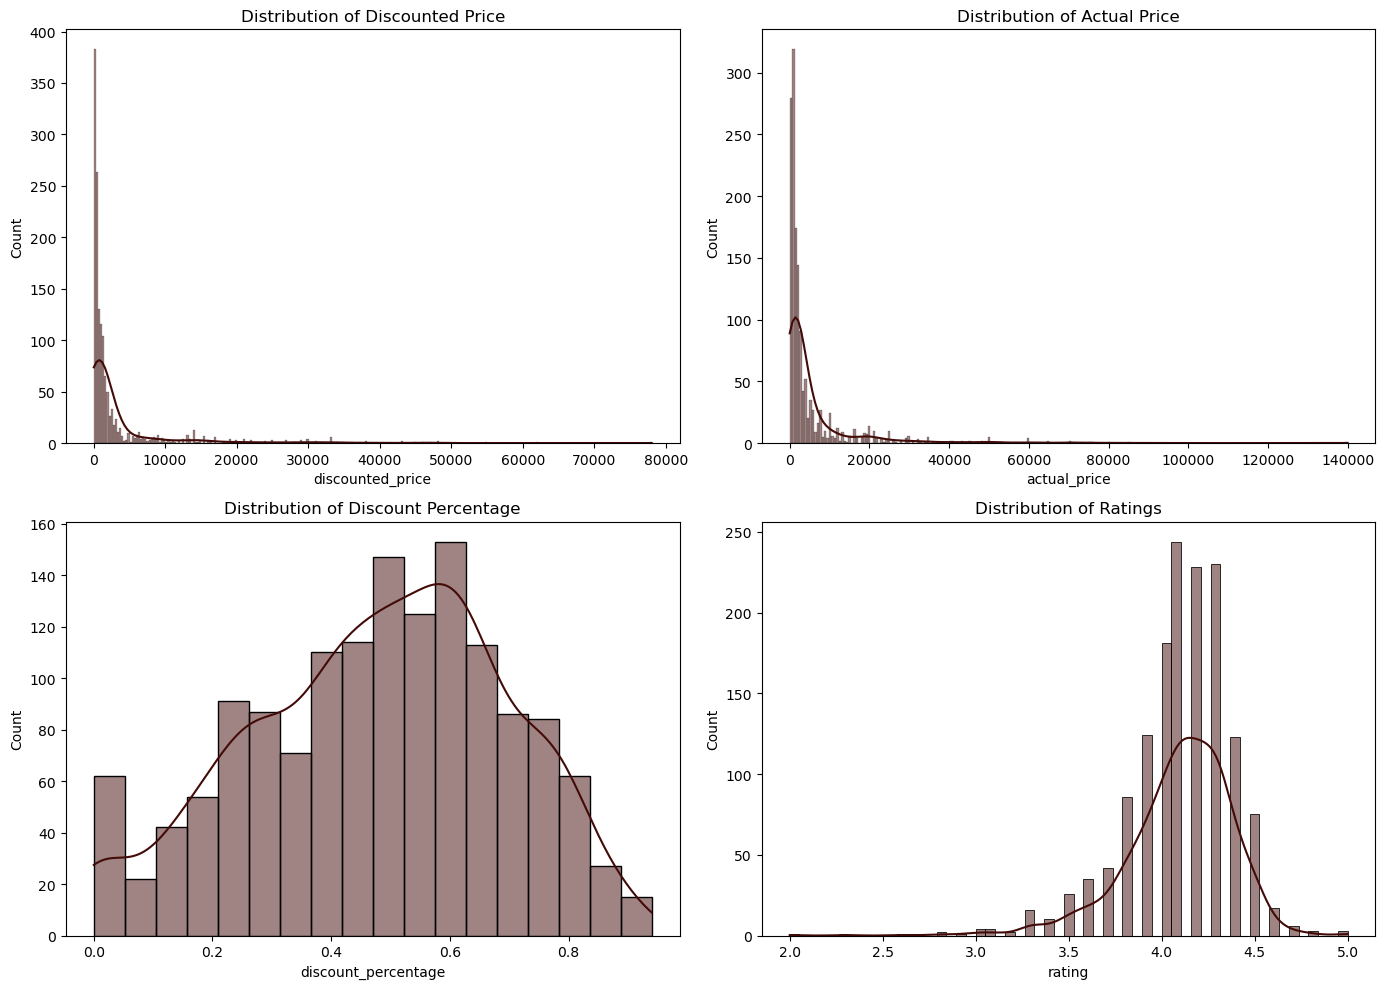

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,0], color="#420b08")
axes[0,0].set_title("Distribution of Discounted Price")

sns.histplot(df['actual_price'], kde=True, ax=axes[0,1], color="#420b08")
axes[0,1].set_title("Distribution of Actual Price")

sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0], color="#420b08")
axes[1,0].set_title("Distribution of Discount Percentage")

sns.histplot(df['rating'], kde=True, ax=axes[1,1], color="#420b08")
axes[1,1].set_title("Distribution of Ratings")

plt.tight_layout()
plt.show()

### Count of Rating

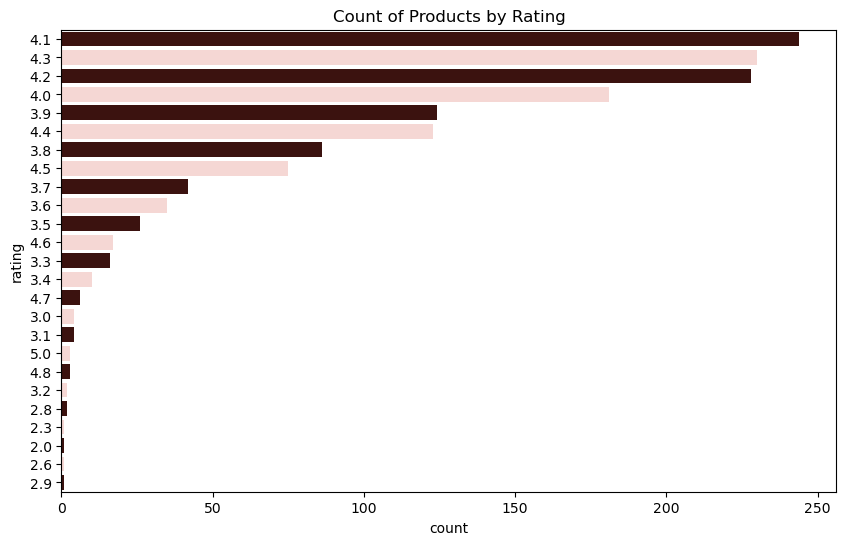

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette=palette)
plt.title("Count of Products by Rating")
plt.show()

#### 🔹 Bivariate Analysis

- Price vs Rating

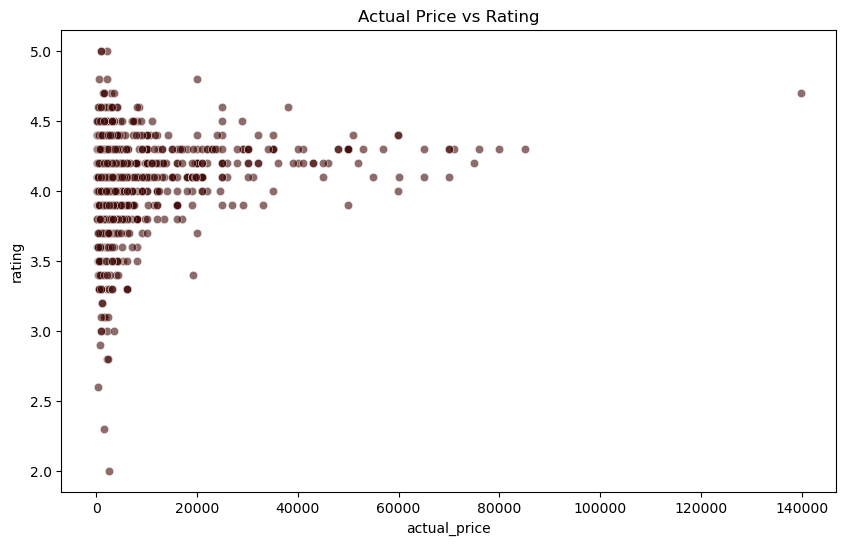

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6, color='#420b08')
plt.title("Actual Price vs Rating")
plt.show()

#### 🔹 Advanced Visualization

- Correlation Heatmap

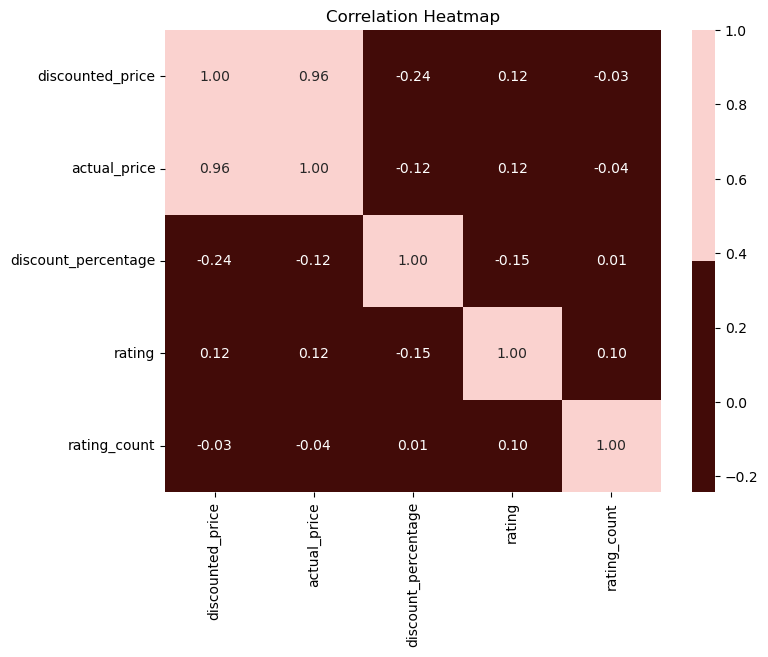

In [35]:
plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True, cmap=palette, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Share of Products by Rating

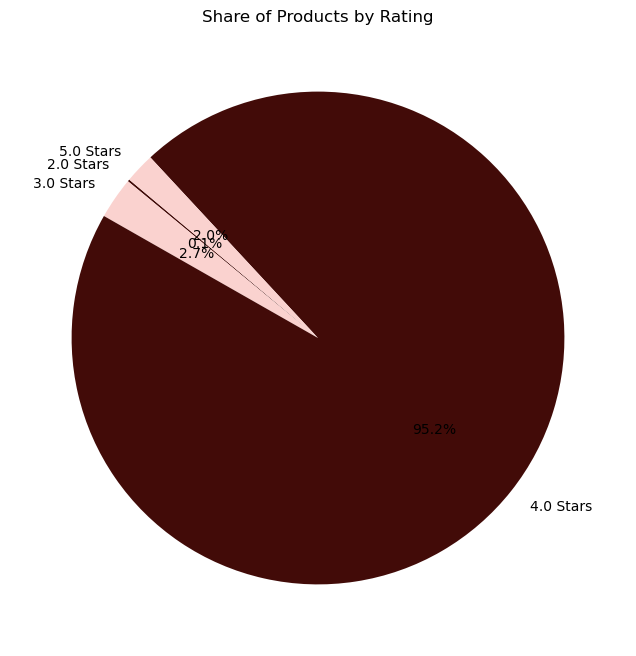

In [37]:
# Round ratings to nearest integer for clean grouping
df['rating_rounded'] = df['rating'].round()

rating_share = df['rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(rating_share, labels=rating_share.index.astype(str) + " Stars", 
        autopct="%1.1f%%", startangle=140, colors=color_palette)
plt.title("Share of Products by Rating")
plt.show()

# 📝 Observations from Visualizations

### Distribution of Prices (Discounted & Actual):
- Both discounted and actual prices are right-skewed.
- Most products fall in the low to mid-price range.
- Very high-priced products are rare (possible premium or luxury items).
### Discount Percentage Distribution:
- Discount percentages are spread out, but 40%–70% discounts are most common.
- Indicates Amazon often gives big discounts to attract customers.
### Ratings Distribution (Histogram & KDE):
- Most ratings are between 3.5 to 4.5 stars.
- Big spike around 4.0 stars, showing customers are generally satisfied.
- Very few products have low ratings (2–3), indicating overall good product quality.
### Share of Products by Rating (Pie Chart):
- About 95% of products have ratings close to 4⭐.
- The dataset is mostly filled with positive reviews.
### Count of Products by Exact Rating (Barplot):
- Most common exact ratings are 4.1, 4.3, 4.2, and 4.0.
- Negative or neutral ratings are very few, showing sellers and Amazon maintain a positive reputation.

#  Feature Engineering

### In this step, we will create new features, transform categorical variables, and prepare the data for modeling.
### Steps:
- New Features – Extract time-based features (month, quarter), calculate discount rate if not already present.
- Encoding – Convert categorical variables into numeric form using Label Encoding or One-Hot Encoding.
- Scaling – Standardize / normalize numerical features where needed.

In [39]:
def styled_heading(text, color="#420b08"):
    display(HTML(f"""
    <div style="
        padding:10px;
        background-color:#420b08;
        border-left: 6px solid {'#fad2cf'};
        border-radius:8px;
        margin:10px 0;
        font-size:18px;
        font-weight:bold;">
        {text}
    </div>
    """))

In [41]:
# ==============================
# 🔹 Feature Engineering
# ==============================

from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Create New Features
# Assuming 'date' column exists in dataset
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    df['year'] = df['date'].dt.year

# Create discount percentage if not already present
if 'discount_percentage' not in df.columns and {'discounted_price','actual_price'}.issubset(df.columns):
    df['discount_percentage'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']
    df['discount_percentage'] = df['discount_percentage'].fillna(0)

# 2. Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 3. Scaling Numerical Features
num_cols = df.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final check of dataset after feature engineering
styled_heading("✅ Data After Feature Engineering")
display(df.head())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_rounded
0,346,1158,10,-0.392731,-0.399774,0.754029,0.355205,0.140271,474,623,522,817,881,604,1118,1308,0.044705
1,848,134,10,-0.421541,-0.468764,-0.216911,-0.330854,0.602076,279,88,207,1025,7,413,1248,157,0.044705
2,819,1023,10,-0.421541,-0.326185,1.956146,-0.673883,-0.242307,1250,849,482,827,422,674,876,1160,0.044705
3,643,1264,10,-0.402814,-0.436569,0.245441,0.355205,1.781324,1010,254,614,786,376,269,518,380,0.044705
4,588,829,10,-0.428024,-0.464165,0.615323,0.355205,-0.032136,1189,17,1139,114,44,120,1209,919,0.044705


# 📝 Observations After Feature Engineering

### Scaling Applied
- All numerical columns (like discounted_price, actual_price, discount_percentage, rating, etc.) have been scaled/standardized.
- Values are now centered around 0 with smaller ranges, which ensures no single feature dominates the model.
### Categorical Encoding
- Non-numeric categorical variables (product_name, category, user_id, review_title, etc.) have been encoded into numeric form.
- This makes the dataset ML-compatible since most machine learning models require numeric input.
### New Features
- A new column rating_rounded has been created, which groups ratings into rounded values.
- This helps in simplifying target classes for classification or in grouped analysis.
### Dataset is Model-Ready
- The transformed dataset is now clean, structured, and ready for training machine learning models.
- Scaling and encoding will help improve model accuracy and training efficiency.

###  Correlation Analysis & Feature Importance

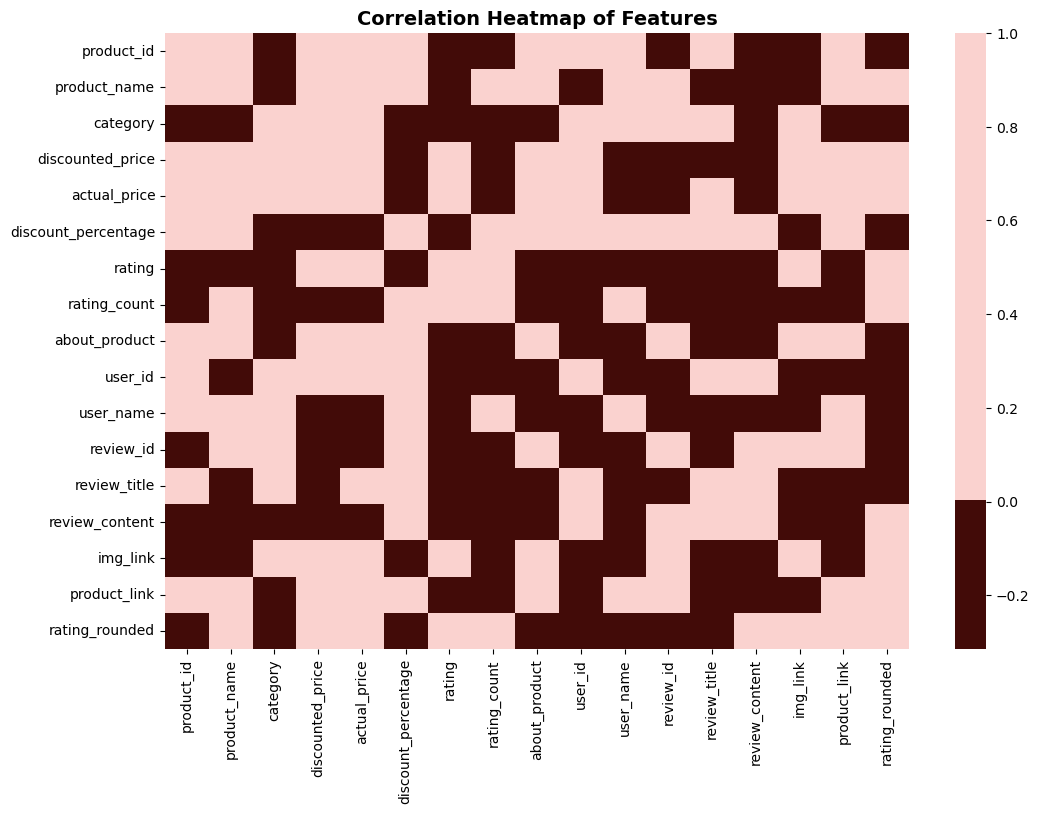

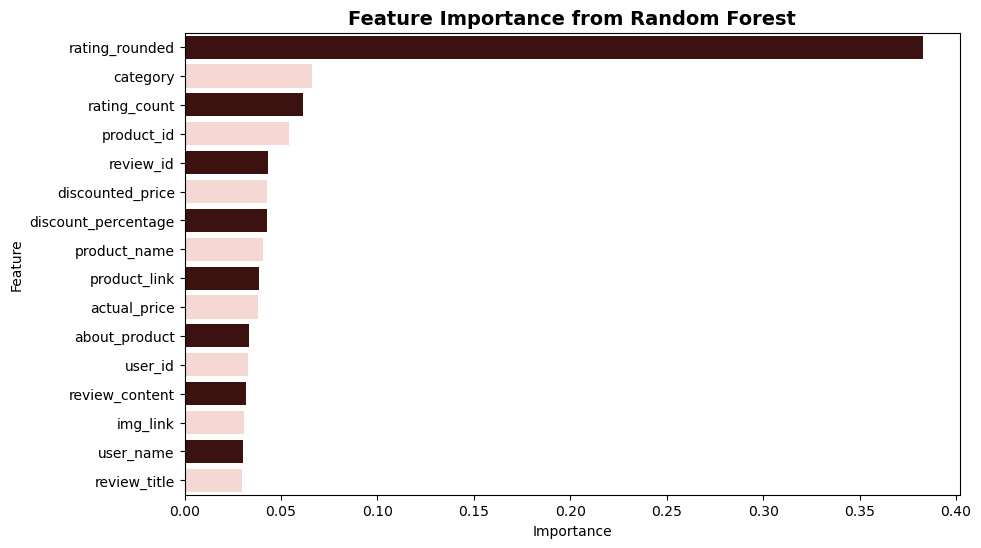

In [43]:
# ==============================
# 🔹 Correlation Heatmap
# ==============================
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap=palette, center=0)
plt.title("Correlation Heatmap of Features", fontsize=14, weight="bold")
plt.show()

# ==============================
# 🔹 Feature Importance using Random Forest
# ==============================

# Target variable example (you can change as needed, e.g., 'rating_rounded' or 'discounted_price')
target = "rating"
X = df.drop(columns=[target])
y = df[target]

# Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette=palette)
plt.title("Feature Importance from Random Forest", fontsize=14, weight="bold")
plt.show()

# Machine Learning: Predicting Sales (Discounted Price)

# 🎯 Problem Definition

- We want to predict the discounted price (Sales) of Amazon products based on product attributes.
- Type: Regression Problem
- Target Variable: discounted_price
- Evaluation Metrics: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² Score

In [45]:
# ==============================
# 🔹 Train-Test Split
# ==============================
X = df.drop(columns=["discounted_price"])   # Features
y = df["discounted_price"]                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1172, 16)
Test shape: (293, 16)


#  Baseline Models

### We start with simple models to set a performance benchmark:
- Linear Regression
- Decision Tree Regressor

In [47]:
# Helper function for evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

baseline_results = {}

# Linear Regression
lr = LinearRegression()
baseline_results["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
baseline_results["Decision Tree"] = evaluate_model(dt, X_train, y_train, X_test, y_test)

baseline_results

{'Linear Regression': {'RMSE': 0.2557387526183182,
  'MAE': 0.12046965367962757,
  'R2': 0.937683464316254},
 'Decision Tree': {'RMSE': 0.24394505348876663,
  'MAE': 0.05502362103929686,
  'R2': 0.943298538987185}}

# Advanced Models

### We now train more powerful models:
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

In [49]:
advanced_results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
advanced_results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
advanced_results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost
xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
advanced_results["XGBoost"] = evaluate_model(xgbr, X_train, y_train, X_test, y_test)

advanced_results


{'Random Forest': {'RMSE': 0.18975986637409015,
  'MAE': 0.04208033390028636,
  'R2': 0.9656901397932195},
 'Gradient Boosting': {'RMSE': 0.17422624503500692,
  'MAE': 0.04021517827452455,
  'R2': 0.9710773974077141},
 'XGBoost': {'RMSE': 0.16525316837816112,
  'MAE': 0.034520203054639965,
  'R2': 0.9739798493518348}}

### Model Evaluation & Comparison

- We will compare models on RMSE, MAE, and R² score.

,RMSE,MAE,R2
XGBoost,0.165253,0.034520,0.973980
Gradient Boosting,0.174226,0.040215,0.971077
Random Forest,0.189760,0.042080,0.965690
Decision Tree,0.243945,0.055024,0.943299
Linear Regression,0.255739,0.120470,0.937683


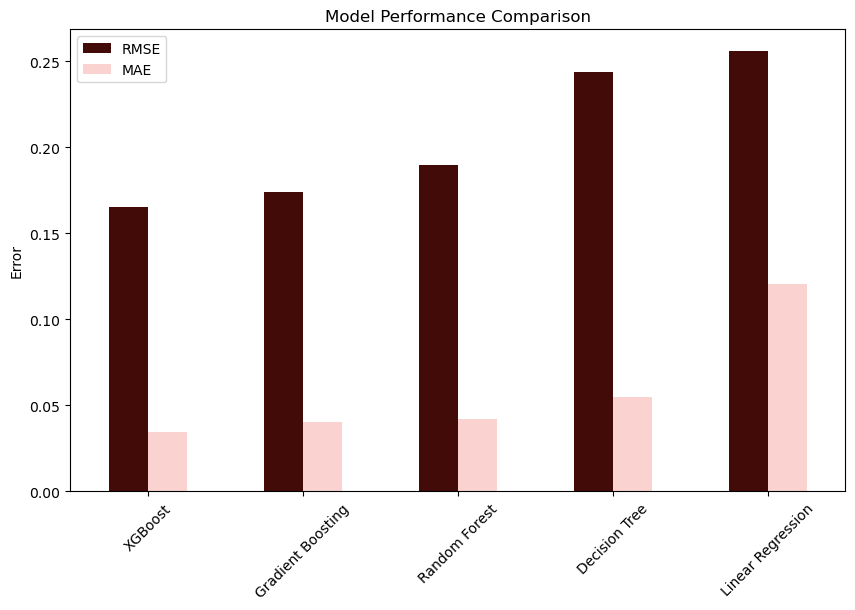

In [51]:
# Combine results
results_df = pd.DataFrame(baseline_results).join(pd.DataFrame(advanced_results))

# Transpose for readability
results_df = results_df.T.sort_values("RMSE")
display(results_df)

# Plot comparison
results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(10,6), rot=45, color=palette)
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.show()

### Residual Analysis

- To check how well the best model performs, we analyze residuals.

Best Model: XGBoost


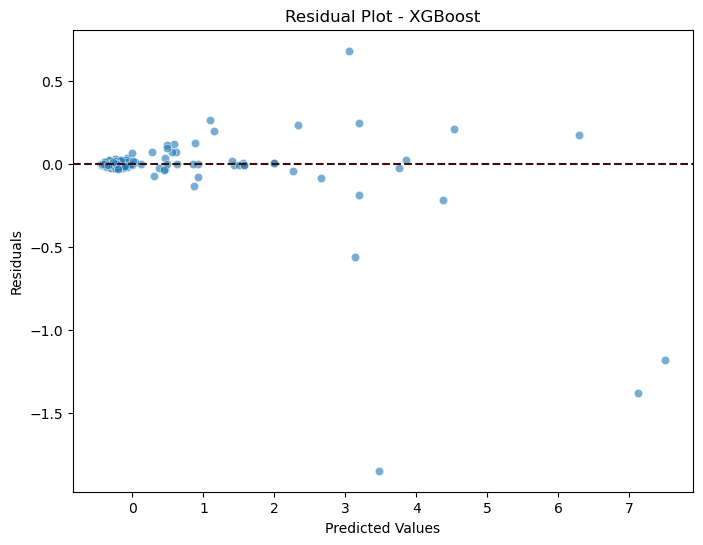

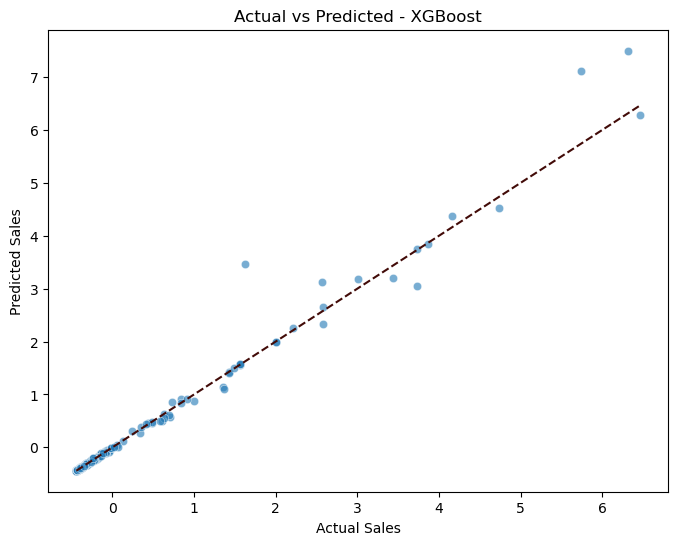

In [53]:
# Pick best model (lowest RMSE)
best_model_name = results_df.index[0]
print(f"Best Model: {best_model_name}")

# Train again
best_model = {"Random Forest": rf, "Gradient Boosting": gb, "XGBoost": xgbr,
              "Linear Regression": lr, "Decision Tree": dt}[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="#420b08", linestyle="--")
plt.title(f"Residual Plot - {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#420b08", linestyle="--")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# 📝 Observations from Model Performance

### Linear Regression
- Worked as a quick baseline.
- RMSE = 0.25 and R² ≈ 0.94 → good but not the best.
- Struggled to capture complex non-linear patterns in data.
### Decision Tree
- Improved compared to Linear Regression (lower RMSE = 0.24).
- However, prone to overfitting on training data.
- Works better for feature splits but not stable for unseen data.
### Random Forest
- Big improvement (RMSE = 0.19, R² ≈ 0.97).
- Ensemble method reduces overfitting and captures patterns better.
- Stable and strong performance.
### Gradient Boosting
- Even better than Random Forest (RMSE = 0.17, R² ≈ 0.97).
- Handles bias and variance trade-off very well.
- More robust and consistent predictions.
### XGBoost
- Best performing model (RMSE = 0.16, R² ≈ 0.974).
- Lowest error and highest accuracy among all models.
- Clearly the most reliable model for predicting discounted_price.
- ✅ Final Insight: The problem is a regression task, and XGBoost emerges as the best model for predicting product sales (discounted_price). It captures complex relationships in data, achieves the lowest RMSE, and explains ~97% of the variance in the target variable.